In [1]:
import pandas as pd
from xlib import data
df=data.get_all_index_data()
bench=data.get_index_data(index="000300",start_date="20200101",end_date="20220330",renew=False)
print(df)
print(bench)

              date   open  close   high    low     volume        amount  \
0       2015-01-05   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
1       2015-01-06   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
2       2015-01-07   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
3       2015-01-08   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
4       2015-01-09   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
...            ...    ...    ...    ...    ...        ...           ...   
528595  2022-03-24  17.58  17.48  18.00  17.42  1064824.0  1.880967e+09   
528596  2022-03-25  17.30  17.41  17.90  17.11   960229.0  1.685567e+09   
528597  2022-03-28  17.10  17.77  17.91  17.01  1042086.0  1.837873e+09   
528598  2022-03-29  17.63  17.48  17.84  17.39   655772.0  1.154358e+09   
528599  2022-03-30  17.55  18.98  19.05  17.47  2195064.0  4.075694e+09   

        swing  chg_pct  chg_amount  turnover  factor   symbol  
0        0.00     0.00        0.00 

In [2]:
from xlib import factors
df=factors.getTA(df)
df['label']=df.groupby('symbol')['close'].shift(10)
df['label']=df['close']/df['label']
print(df)

              date   open  close   high    low     volume        amount  \
0       2015-01-05   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
1       2015-01-06   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
2       2015-01-07   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
3       2015-01-08   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
4       2015-01-09   0.00   0.00   0.00   0.00        0.0  0.000000e+00   
...            ...    ...    ...    ...    ...        ...           ...   
528595  2022-03-24  17.58  17.48  18.00  17.42  1064824.0  1.880967e+09   
528596  2022-03-25  17.30  17.41  17.90  17.11   960229.0  1.685567e+09   
528597  2022-03-28  17.10  17.77  17.91  17.01  1042086.0  1.837873e+09   
528598  2022-03-29  17.63  17.48  17.84  17.39   655772.0  1.154358e+09   
528599  2022-03-30  17.55  18.98  19.05  17.47  2195064.0  4.075694e+09   

        swing  chg_pct  chg_amount  ...   MAX  MAXINDEX   MIN  MININDEX  \
0        0.00     0.00  

Dropped 0.7% entries from factor data: 0.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-111.472052,9.980368,-0.260905,3.112405,71330,18.116706
2,-75.166641,19.045708,0.190126,1.660623,89354,22.694520
3,-62.798569,33.774006,0.232336,2.238366,72454,18.402184
4,-50.314587,41.879914,0.234091,2.663930,51183,12.999683
5,-45.833863,43.326384,0.222280,3.372177,32711,8.308083
6,-34.291136,45.014839,0.105955,3.703751,22766,5.782208
7,-25.517151,51.290109,0.145706,3.812072,20997,5.332910
8,-18.285026,53.134496,-0.216552,4.619947,11860,3.012255
9,-12.706478,53.958211,-0.011792,3.197053,14271,3.624611


Returns Analysis


,10D
Ann. alpha,0.103
beta,0.004
Mean Period Wise Return Top Quantile (bps),136.535
Mean Period Wise Return Bottom Quantile (bps),37.410
Mean Period Wise Spread (bps),99.125


<Figure size 432x288 with 0 Axes>

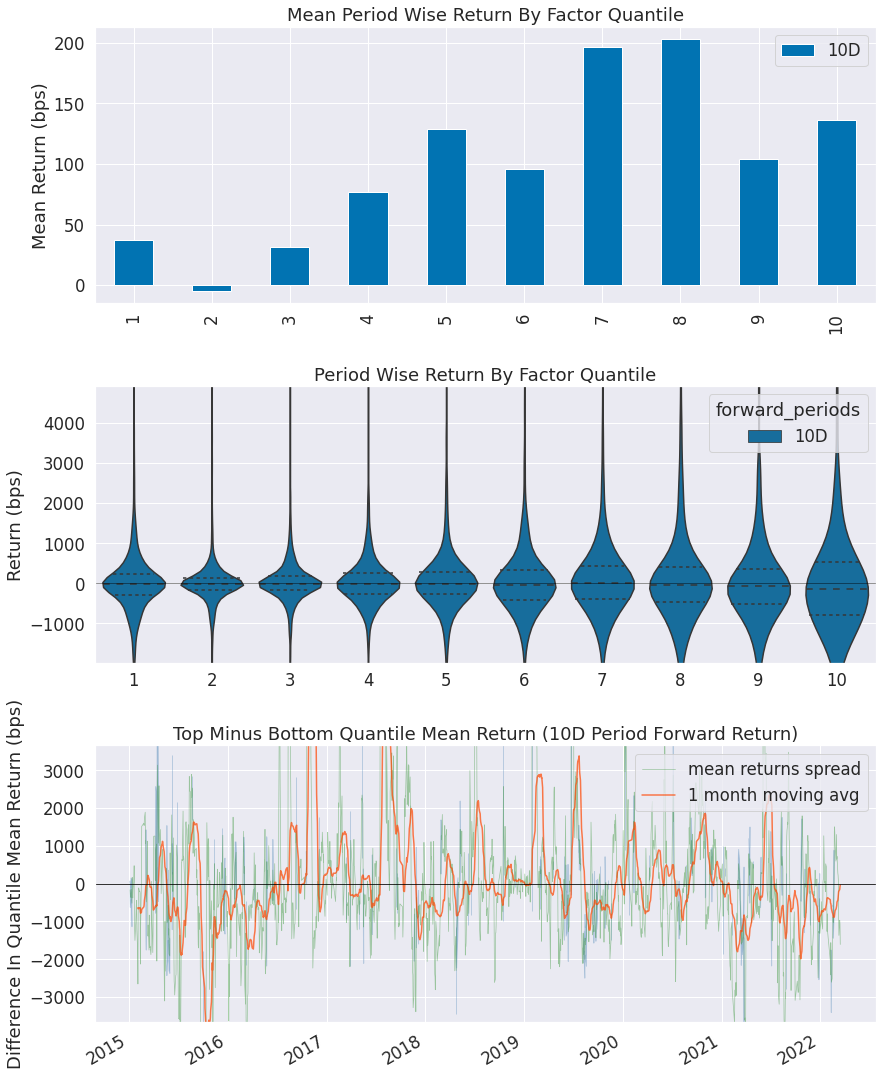

Information Analysis


,10D
IC Mean,-0.026
IC Std.,0.189
Risk-Adjusted IC,-0.139
t-stat(IC),-5.836
p-value(IC),0.000
IC Skew,-0.176
IC Kurtosis,-0.030


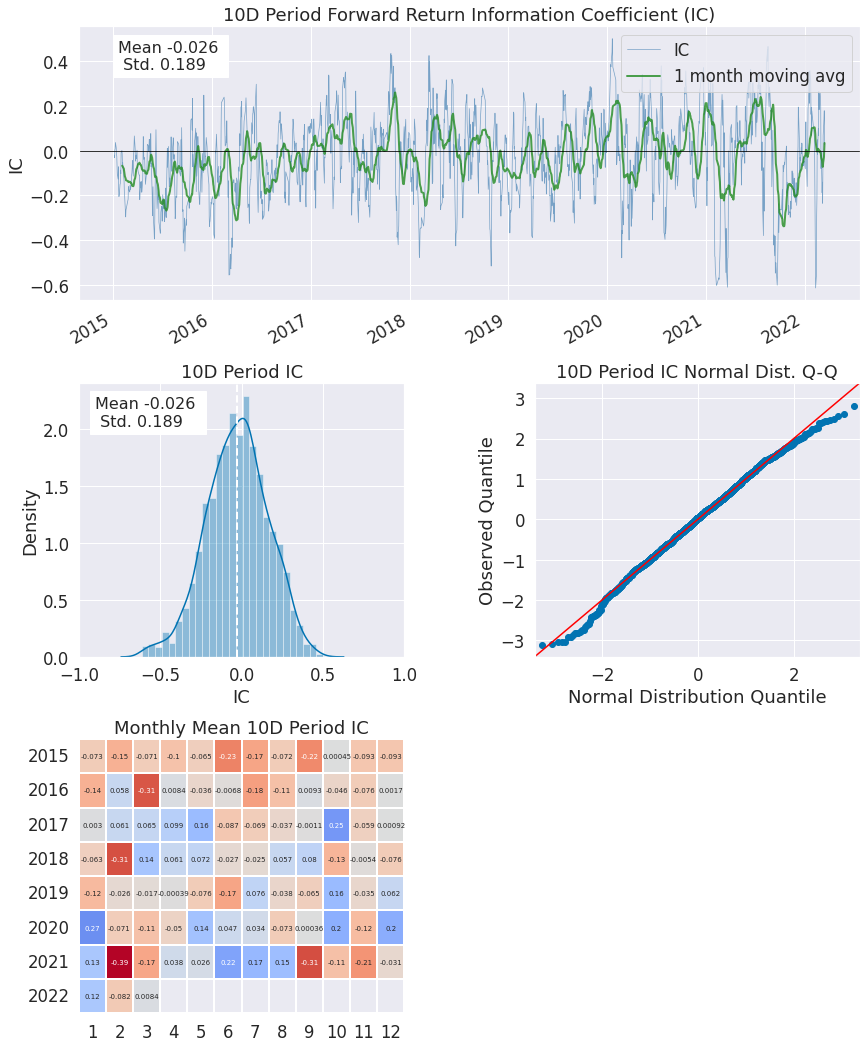

Turnover Analysis


,10D
Quantile 1 Mean Turnover,0.511
Quantile 2 Mean Turnover,0.672
Quantile 3 Mean Turnover,0.747
Quantile 4 Mean Turnover,0.792
Quantile 5 Mean Turnover,0.818
Quantile 6 Mean Turnover,0.834
Quantile 7 Mean Turnover,0.842
Quantile 8 Mean Turnover,0.861
Quantile 9 Mean Turnover,0.840
Quantile 10 Mean Turnover,0.542


,10D
Mean Factor Rank Autocorrelation,0.64


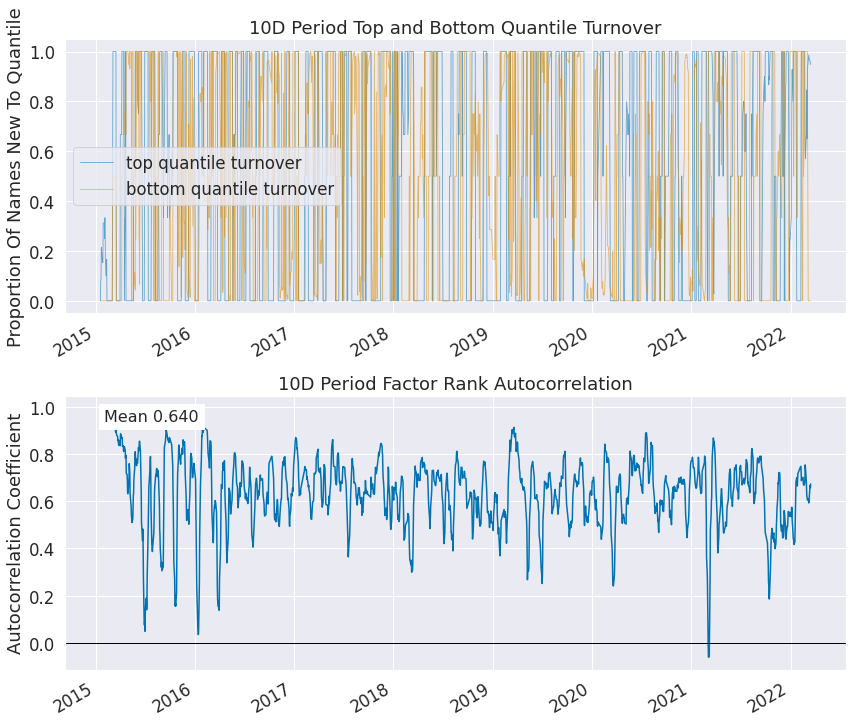

In [3]:
factors.analysis(df,'MACD')

In [4]:
from xlib import model

df_train,df_valid,df_pred=model.datasplit(df,train_end='2019-01-01',valid_end='2020-01-01')
model.lgbtrain(df_train,df_valid,label='label')  

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l2: 4.57365e+73	valid_0's l1: 1.63241e+36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 4.20576e+73	valid_0's l1: 1.56103e+36
[3]	valid_0's l2: 3.90203e+73	valid_0's l1: 1.49686e+36
[4]	valid_0's l2: 3.58951e+73	valid_0's l1: 1.43025e+36
[5]	valid_0's l2: 3.30991e+73	valid_0's l1: 1.36772e+36
[6]	valid_0's l2: 3.05152e+73	valid_0's l1: 1.30815e+36
[7]	valid_0's l2: 2.8163e+73	valid_0's l1: 1.2511e+36
[8]	valid_0's l2: 2.60558e+73	valid_0's l1: 1.19703e+36
[9]	valid_0's l2: 2.4116e+73	valid_0's l1: 1.14533e+36
[10]	valid_0's l2: 2.23264e+73	valid_0's l1: 1.09602e+36
[11]	valid_0's l2: 2.08125e+73	valid_0's l1: 1.05087e+36
[12]	valid_0's l2: 1.9297e+73	valid_0's l1: 1.00585e+36
[13]	valid_0's l2: 1.79451e+73	valid_0's l1: 9.63897e+35
[14]	valid_0's l2: 1.67132

[144]	valid_0's l2: 1.88068e+72	valid_0's l1: 9.14413e+34
[145]	valid_0's l2: 1.87819e+72	valid_0's l1: 9.14541e+34
[146]	valid_0's l2: 1.87888e+72	valid_0's l1: 9.16922e+34
[147]	valid_0's l2: 1.87859e+72	valid_0's l1: 9.18043e+34
Early stopping, best iteration is:
[142]	valid_0's l2: 1.88373e+72	valid_0's l1: 9.14008e+34
Saving model...


In [5]:
preds=model.lgbpred(df_pred,label='label') 
preds['score']=preds['pred']
preds['rank']=preds.groupby('date')['pred'].rank()
preds['signal']=preds.apply(lambda x: 1 if x['rank']<=10 else 0 ,axis=1)
print(preds)

              date   open  close   high    low     volume        amount  \
1219    2020-01-02  29.82  32.84  32.84  29.82    46180.0  1.498622e+08   
1220    2020-01-03  32.83  33.06  34.72  31.63    46987.0  1.571306e+08   
1221    2020-01-06  33.05  34.60  35.58  32.03    42036.0  1.462616e+08   
1222    2020-01-07  34.60  36.49  36.62  33.98    33253.0  1.204647e+08   
1223    2020-01-08  35.79  34.75  36.11  34.00    24448.0  8.760443e+07   
...            ...    ...    ...    ...    ...        ...           ...   
528595  2022-03-24  17.58  17.48  18.00  17.42  1064824.0  1.880967e+09   
528596  2022-03-25  17.30  17.41  17.90  17.11   960229.0  1.685567e+09   
528597  2022-03-28  17.10  17.77  17.91  17.01  1042086.0  1.837873e+09   
528598  2022-03-29  17.63  17.48  17.84  17.39   655772.0  1.154358e+09   
528599  2022-03-30  17.55  18.98  19.05  17.47  2195064.0  4.075694e+09   

        swing  chg_pct  chg_amount  ...  MININDEX  MINIDX  MAXIDX       MULT  \
1219    10.14    10

In [6]:
from xlib.strategies import Top10Strategy
from xlib import backtest

returns=backtest.test(preds,Top10Strategy)

loading datas...
runing backtest...


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2020-01-02  2020-01-02
End Period                 2022-03-30  2022-03-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          39.06%      -2.57%
CAGR﹪                     15.85%      -1.15%

Sharpe                     0.8         0.05
Smart Sharpe               0.75        0.05
Sortino                    1.14        0.07
Smart Sortino              1.07        0.07
Sortino/√2                 0.8         0.05
Smart Sortino/√2           0.76        0.05
Omega                      1.14        1.14

Max Drawdown               -23.69%     -39.21%
Longest DD Days            250         736
Volatility (ann.)          22.34%      21.26%
R^2                        0.51        0.51
Calmar                     0.67        -0.03
Skew                       -0.28       0.77
Kurtosis                   1.39        

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-07-23,2022-03-29,2022-03-30,250,-23.693216,-21.880171
2,2021-01-06,2021-03-09,2021-06-22,167,-18.054151,-16.730369
3,2020-02-26,2020-03-23,2020-05-18,82,-16.635184,-16.353880
4,2020-08-31,2020-10-26,2021-01-04,126,-11.123870,-10.864463
5,2020-01-23,2020-02-03,2020-02-17,25,-9.594108,-7.061328


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


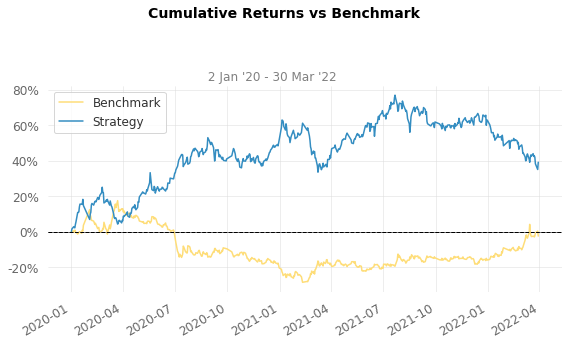

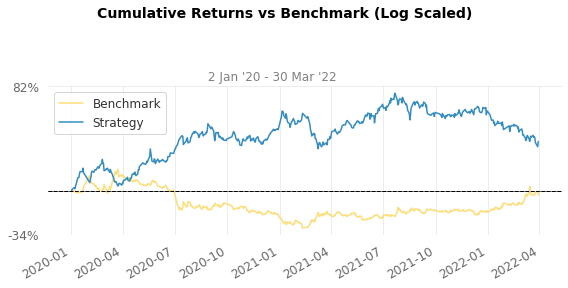

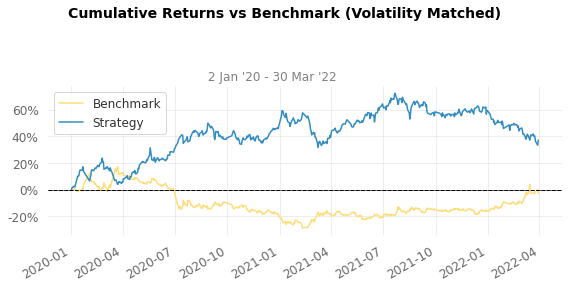

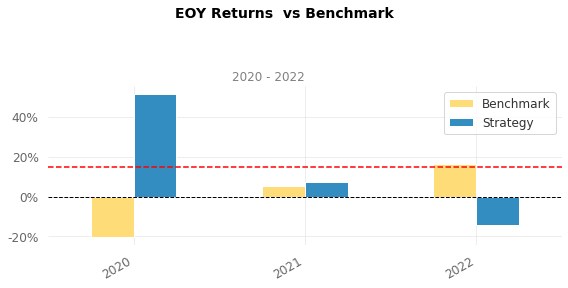

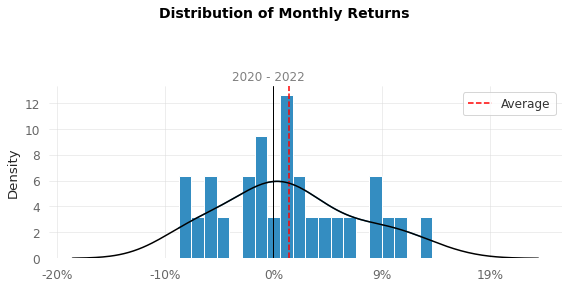

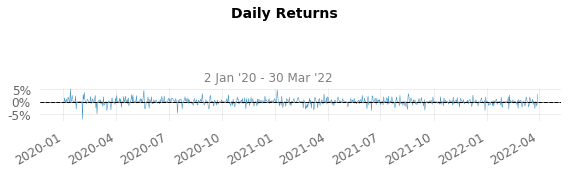

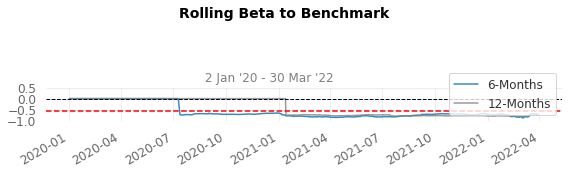

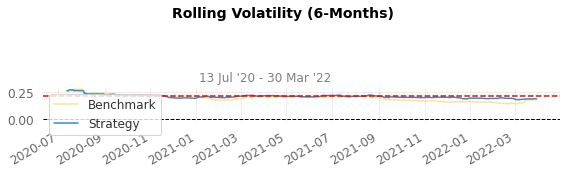

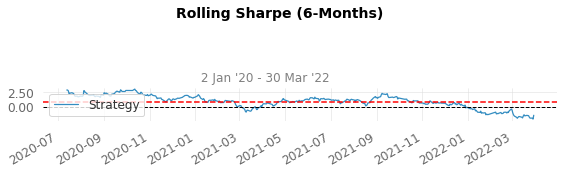

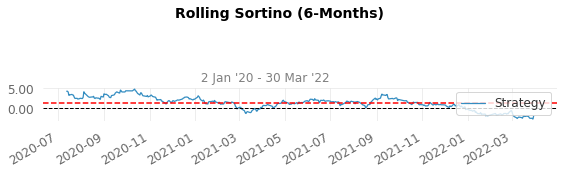

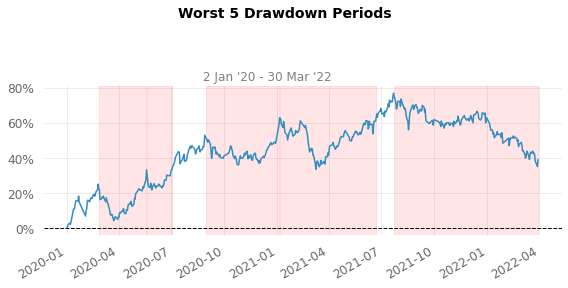

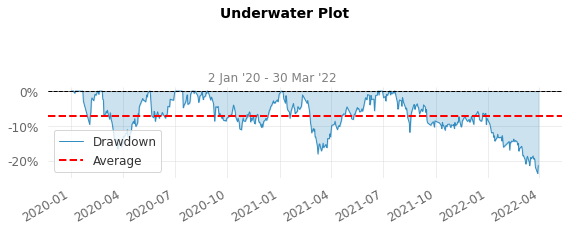

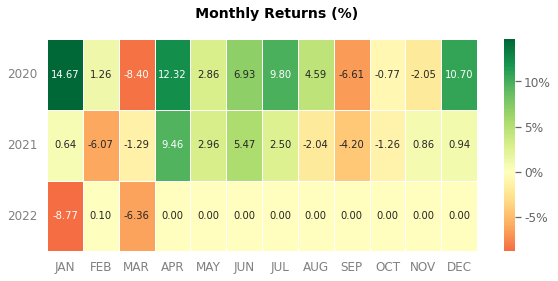

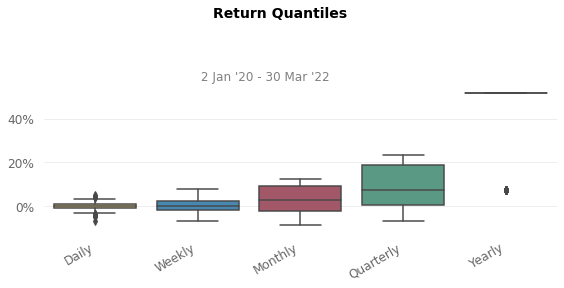

In [7]:
backtest.analysis(returns,bench)